# Lab 2
## Using Python for Exploratory Data Analysis (EDA)

The first part of Lab2 is to go through a demo for EDA of a relatively clean tabular data called *Auto MPG data*. This data set comes from the UCI Machine Learning Data Repository (http://archive.ics.uci.edu/ml/) and can be found at http://archive.ics.uci.edu/ml/datasets/Auto+MPG. We provide a slightly modified version of this data set as file `cars.csv`.

To load this data set and pursue EDA, it is a good idea to use several popular Python packages, which come preloaded with the Anaconda software:
- pandas (http://pandas.pydata.org/) -- a library for data science
- numpy (http://www.numpy.org/) -- a library for data computations
- matplotlib (http://matplotlib.org/) -- a library for data visualization

The main feature of *pandas* is its `DataFrame` data structure that provides an intuitive way of handling tabular data. The main feature of *numpy* is its `array` data structure that represents matrices and allows us to perform matrix algebra operations. *matplotlib* allows visualizing data stored in `DataFrame` or `array` objects. 

As you will soon realize, each new Python library requires spending some time to learn about it. There are several nice tutorials that you can find on the web that get you started with the 3 libraries. A particularly great resource for learning about those libraries is your textbook *Python for Data Analysis*, so please take some time to browse its contents and try to run the code provided in it. When learning about the new libraries, you are best advised to jump in and immediatelly start tinkering with the code. The more time you spend using the library, the more you will uncover about all the great features and posibilities the library offers you.

Let us start by loading the 3 libraries in a particular way that many data scientists prefer.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# the following line allows ipython to display plots
%matplotlib inline  

**Question 1**: What are we accomplishing with `as` reserved word?

Using the  `as` keyword allows us to provide an alias for the package name so that we can us the abbrievatted pd or np instead of having to type the whole package name each time we use it.

`cars.csv` is in an easy-to-read comma separated format and the following *pandas* functionality makes it easy to read it into a `DataFrame` object. 

In [6]:
# read this csv file, remember to put the full path to 
# the directory where you saved the data
df = pd.read_csv('cars.csv')  # df is DataFrame object
print (df.head())    # see the first 5 rows of the loaded table

                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0         130   
1          Buick Skylark 320  15.0          8         350.0         165   
2         Plymouth Satellite  18.0          8         318.0         150   
3              AMC Rebel SST  16.0          8         304.0         150   
4                Ford Torino  17.0          8         302.0         140   

   Weight  Acceleration  Model Origin  
0    3504          12.0     70     US  
1    3693          11.5     70     US  
2    3436          11.0     70     US  
3    3433          12.0     70     US  
4    3449          10.5     70     US  


**Question 2**: How can you display the first 10 rows using method `head`? What are the types of each of the columns in `df`?

To display first 10 rows, `df.head(10)`. Car and origina are object. MPG, Displacement and acceleration are float64. Cylinders, Horsepwoer, Weight and Model are int64.

In [5]:
print(df.dtypes)

Car              object
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Model             int64
Origin           object
dtype: object


There are different ways of exploring and indexing the table. Here are some examples.

In [ ]:
print (list(df.columns))
print (df[0:5])         # print the first 5 rows, same outcome as df.head()
print (df[['Car', 'MPG']][:10])  # print the first 10 rows for selected columns
print (df[df['MPG'] > 40])   # using Boolean condition, print only cars with MPG > 40
print (df.ix[[0,1,5],0:5])   # uses 'ix' indexing, selects rows and columns based on their location in the table

**Question 3**: Show two ways of printing the last 5 rows of `df`. Print the names of the cars with 3 cilinders.

In [7]:
print(df.tail(5))
print(df.iloc[-5:])

                   Car   MPG  Cylinders  Displacement  Horsepower  Weight  \
401    Ford Mustang GL  27.0          4         140.0          86    2790   
402  Volkswagen Pickup  44.0          4          97.0          52    2130   
403      Dodge Rampage  32.0          4         135.0          84    2295   
404        Ford Ranger  28.0          4         120.0          79    2625   
405         Chevy S-10  31.0          4         119.0          82    2720   

     Acceleration  Model  Origin  
401          15.6     82      US  
402          24.6     82  Europe  
403          11.6     82      US  
404          18.6     82      US  
405          19.4     82      US  
                   Car   MPG  Cylinders  Displacement  Horsepower  Weight  \
401    Ford Mustang GL  27.0          4         140.0          86    2790   
402  Volkswagen Pickup  44.0          4          97.0          52    2130   
403      Dodge Rampage  32.0          4         135.0          84    2295   
404        Ford Ran

In [9]:
print(df.loc[df['Cylinders'] == 3]['Car'].values)

['Mazda RX2 Coupe' 'Mazda RX3' 'Mazda RX-4' 'Mazda RX-7 GS']


Now, we are ready to start plotting the data.

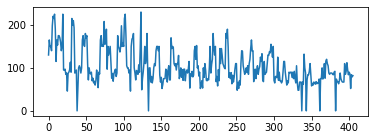

In [10]:
plt.figure(figsize=(6,2))  # can control the size of the display
plt.plot(df['Horsepower'])      # display 'Model' attribute

**Question 4**: Plot *Horsepower* attribute, but only for the US cars. 

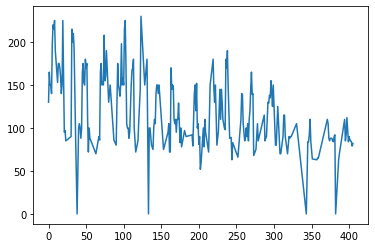

In [12]:
plt.plot(df.loc[df['Origin'] == 'US']['Horsepower'])

To plot the histogram of a selected attribute:

130


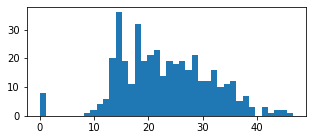

In [29]:
fig = plt.figure(figsize=(5,2))
bin_num = len(df['MPG'].unique())

print(bin_num)
plt.hist(df['MPG'], bins=40);   # ; suppresses Out


5


(array([  4., 207.,   3.,  84., 108.]),
 array([3., 4., 5., 6., 7., 8.]),
 <BarContainer object of 5 artists>)

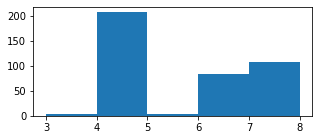

In [27]:
fig = plt.figure(figsize=(5,2))
bin_num = len(df['Cylinders'].unique())
print(bin_num)
plt.hist(df['Cylinders'], bins=bin_num) 

**Question 5**: What can we conclude by looking at the histogram? Explain in one-two sentences. Figure out what is your preferred number of bins for *MPG* and *Cylinders* and argue why.

From the original histogram we can conclude that the mode of MPG is 15, and the number of cars with higher MPG decreases with a roughly logarithmic slope.

For cylinders my optimal number of bins is 5, because this is the number of unique values of Cylinders.

For MPG, there are too many unique values to use that number as the number of bins. After some trial and error with bin number ranging from 20 - 130, I found 40 to be a good number, because it provides a good amount of detail while preserving the general trend.

The following code provides statistics for number of cylinders.

In [30]:
t = pd.crosstab(index=df["Cylinders"],  # Make a crosstab
                     columns="count")     # Name the count column
t['percentage']= (t/t.sum())*100
print (t)

col_0      count  percentage
Cylinders                   
3              4    0.985222
4            207   50.985222
5              3    0.738916
6             84   20.689655
8            108   26.600985


**Question 6**: Try to learn more about `crosstab` method (by doing Google search) and write a line of code that uses it in a different way on `df` data.

My line of code shows a crosstab of the number of cars with N Cylinders in each model year. It shows a decrease in the popularity of 8 cylinder cars in favor of 4 cylinders in the mid 70s to early 80s.

In [31]:
pd.crosstab(df.Model, df.Cylinders)

Cylinders,3,4,5,6,8
Model,,,,,
70,0,8,0,4,23
71,0,14,0,8,7
72,1,14,0,0,13
73,1,11,0,8,20
74,0,15,0,7,5
75,0,12,0,12,6
76,0,15,0,10,9
77,1,14,0,5,8
78,0,17,1,12,6


Horizontal bar plot:

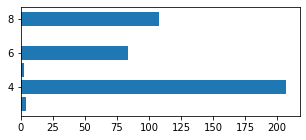

In [32]:
plt.figure(figsize=(5,2))
plt.barh(t.index,t["count"]);

**Question 7**: How about a horizontal bar plot? Can you learn how to control the width of bars and make a plot that has thinner bars?

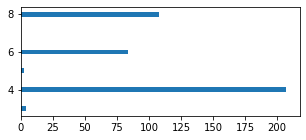

In [39]:
plt.figure(figsize=(5,2))
plt.barh(t.index,t["count"], height=0.25);

Pie chart:

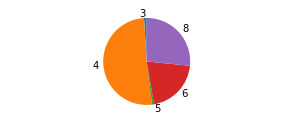

In [40]:
plt.figure(figsize=(5,2))
plt.axis("equal")
plt.pie(t["count"],labels=t.index,startangle=90);

**Question 8**: Do you prefer bar or pie displayed chart and why?

I prefer a pie chart when comparing counts because I feel it gives a better perspective of the comparative proportion of each category. I prefer bar chart for temporal data to show the change in count over time.

The following is a boxplot of MPG values for each of the model years. Pay attention that matplotlib is not used here. Instead, we called a panda `boxplot` method 

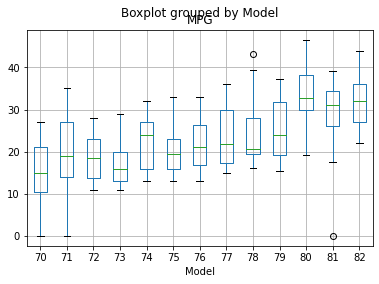

In [41]:
df.boxplot(column='MPG',by='Model');

**Question 9**: Discuss what can you learn from the displayed boxplot. Plot another boxplot using `df` data that you think is very useful and explain what can we learn from it?

The box plot above shows us a trend of increasing MPG over time. It also shows the difference in standard deviation for each year and displays some outliers.

My boxplot below shows the relationship between Horsepower and number of cylinders. We can see that more cylinders generally means more horsepower and that 8-cylinder cars have a much higher range of horsepower.

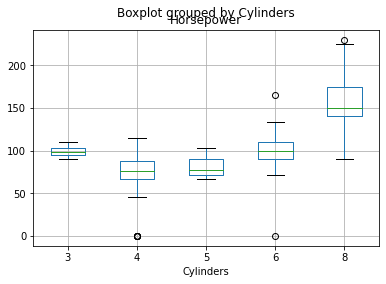

In [46]:
df.boxplot(column='Horsepower',by='Cylinders');

Scatterplot between MPG and Weight attributes:

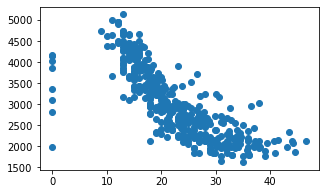

In [44]:
plt.figure(figsize=(5,3))
plt.scatter(df['MPG'],df['Weight']);

**Question 10**: Discuss what can we learn from the displayed scatterplot.  

First we can see that there are some rows in our dataframe that are missing the MPG attribute and use 0 as a placeholder. 
From the scatterplot we can see a trend that lowering weight tends to increase MPG, ie the two are inversely correlated.

We can decide on the size and collor of circles to represent some of data properties. Here, the size is proportional to Cylinders and color is related to Horsepower:

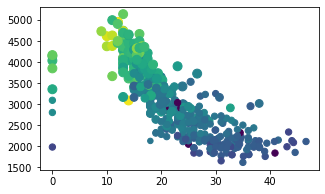

In [47]:
plt.figure(figsize=(5,3))
plt.scatter(df['MPG'],df['Weight'],df['Cylinders']*10,df['Horsepower']);

**Question 11**: Discuss what additional insight we can get from this scatterplot as compared to the previous scatterplot. Plot another scatterplot by picking a different set of attributes that you think is providing a useful view at the data. Discuss what can be concluded from that plot.

From the color of this scatter plot we can see that horsepower is trending downwards along with weight as MPG increases. 

My scatter plot below shows that the change in weight and MPG is temporally correlated, weight decreases and MPG increases as model year increases.

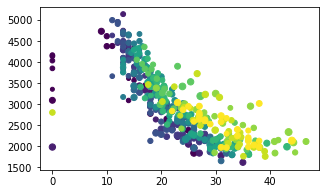

In [53]:
plt.figure(figsize=(5,3))
plt.scatter(df['MPG'],df['Weight'],df['Acceleration']*2,df['Model']);

Pandas `scatter_matrix` method allows us to plot all scatterplots for a data set (it would take a few seconds to display):

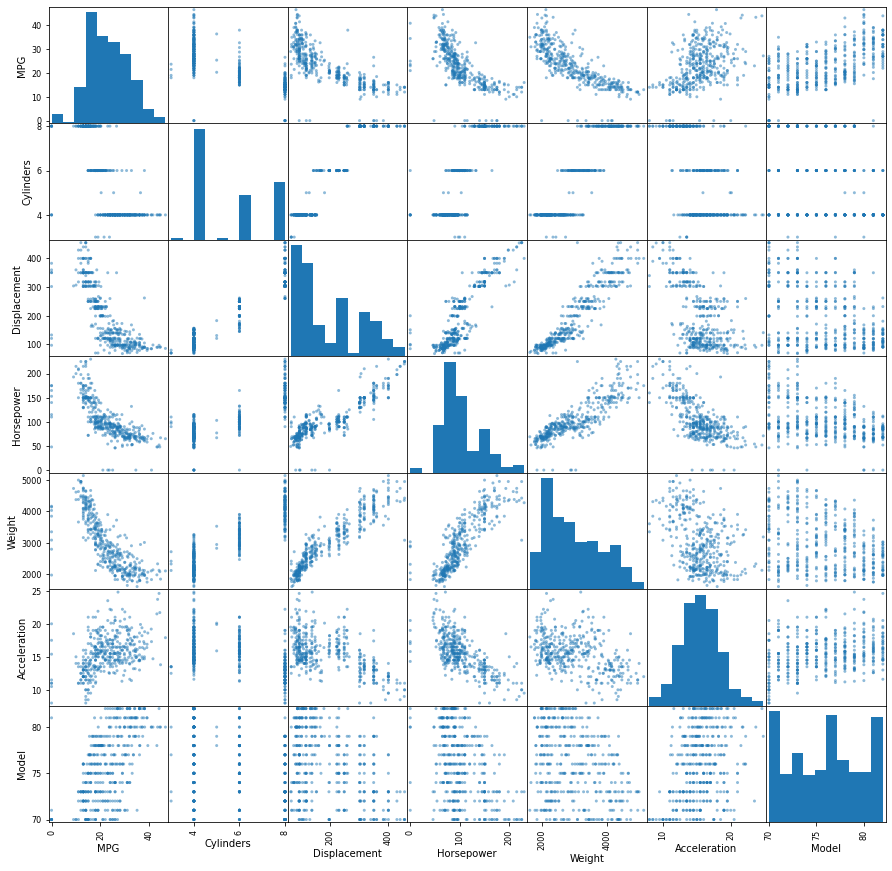

In [54]:
pd.plotting.scatter_matrix(df, figsize=(15, 15));

**Question 12**: Explain what are we seeing from this plot and discuss about the insights you obtained from it.

When you are done with running and playing with the code provided in this file and answering Questions 1-12, **submit** `.ipynb` file containing modifications of this file together with your answers and comments. Feel free to modify the provided code or produce new lines of code.

**Question 13**: Produce a 2 page word document titled "Exploratory Analysis of MPG Data Set". In this document you should combine your own discussion and figures produced by Python to provide a coherent story about the properties of the MPG data set and the most important and interesting insights about the data. You can feel free to frame your story around some known historical facts about the cars and U.S. and World economy during the 1970-1982 period. **Submit** the document as `.pdf` file.